The IBM HR Attrition Dataset is a small dataset containing information about employees in a fictional company. It includes various features such as age, job role, job satisfaction, and salary, among others. The primary focus of this dataset is to predict employee attrition, which is indicated by the "Attrition" column, where "Yes" signifies employees who have left the company and "No" indicates those who have stayed. This dataset is commonly used for exploring factors contributing to employee turnover and for building predictive models to identify potential attrition risks within the organization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
len(data1.columns)

35

In [5]:
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
data1.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [7]:
data1.shape

(1470, 35)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

So, we have int_columns=26 columns and catogarical_columns=9

# Data Preprocessing_1)- Data Cleaning

In [9]:
data1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

So, we have no Null values

In [10]:
data1.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

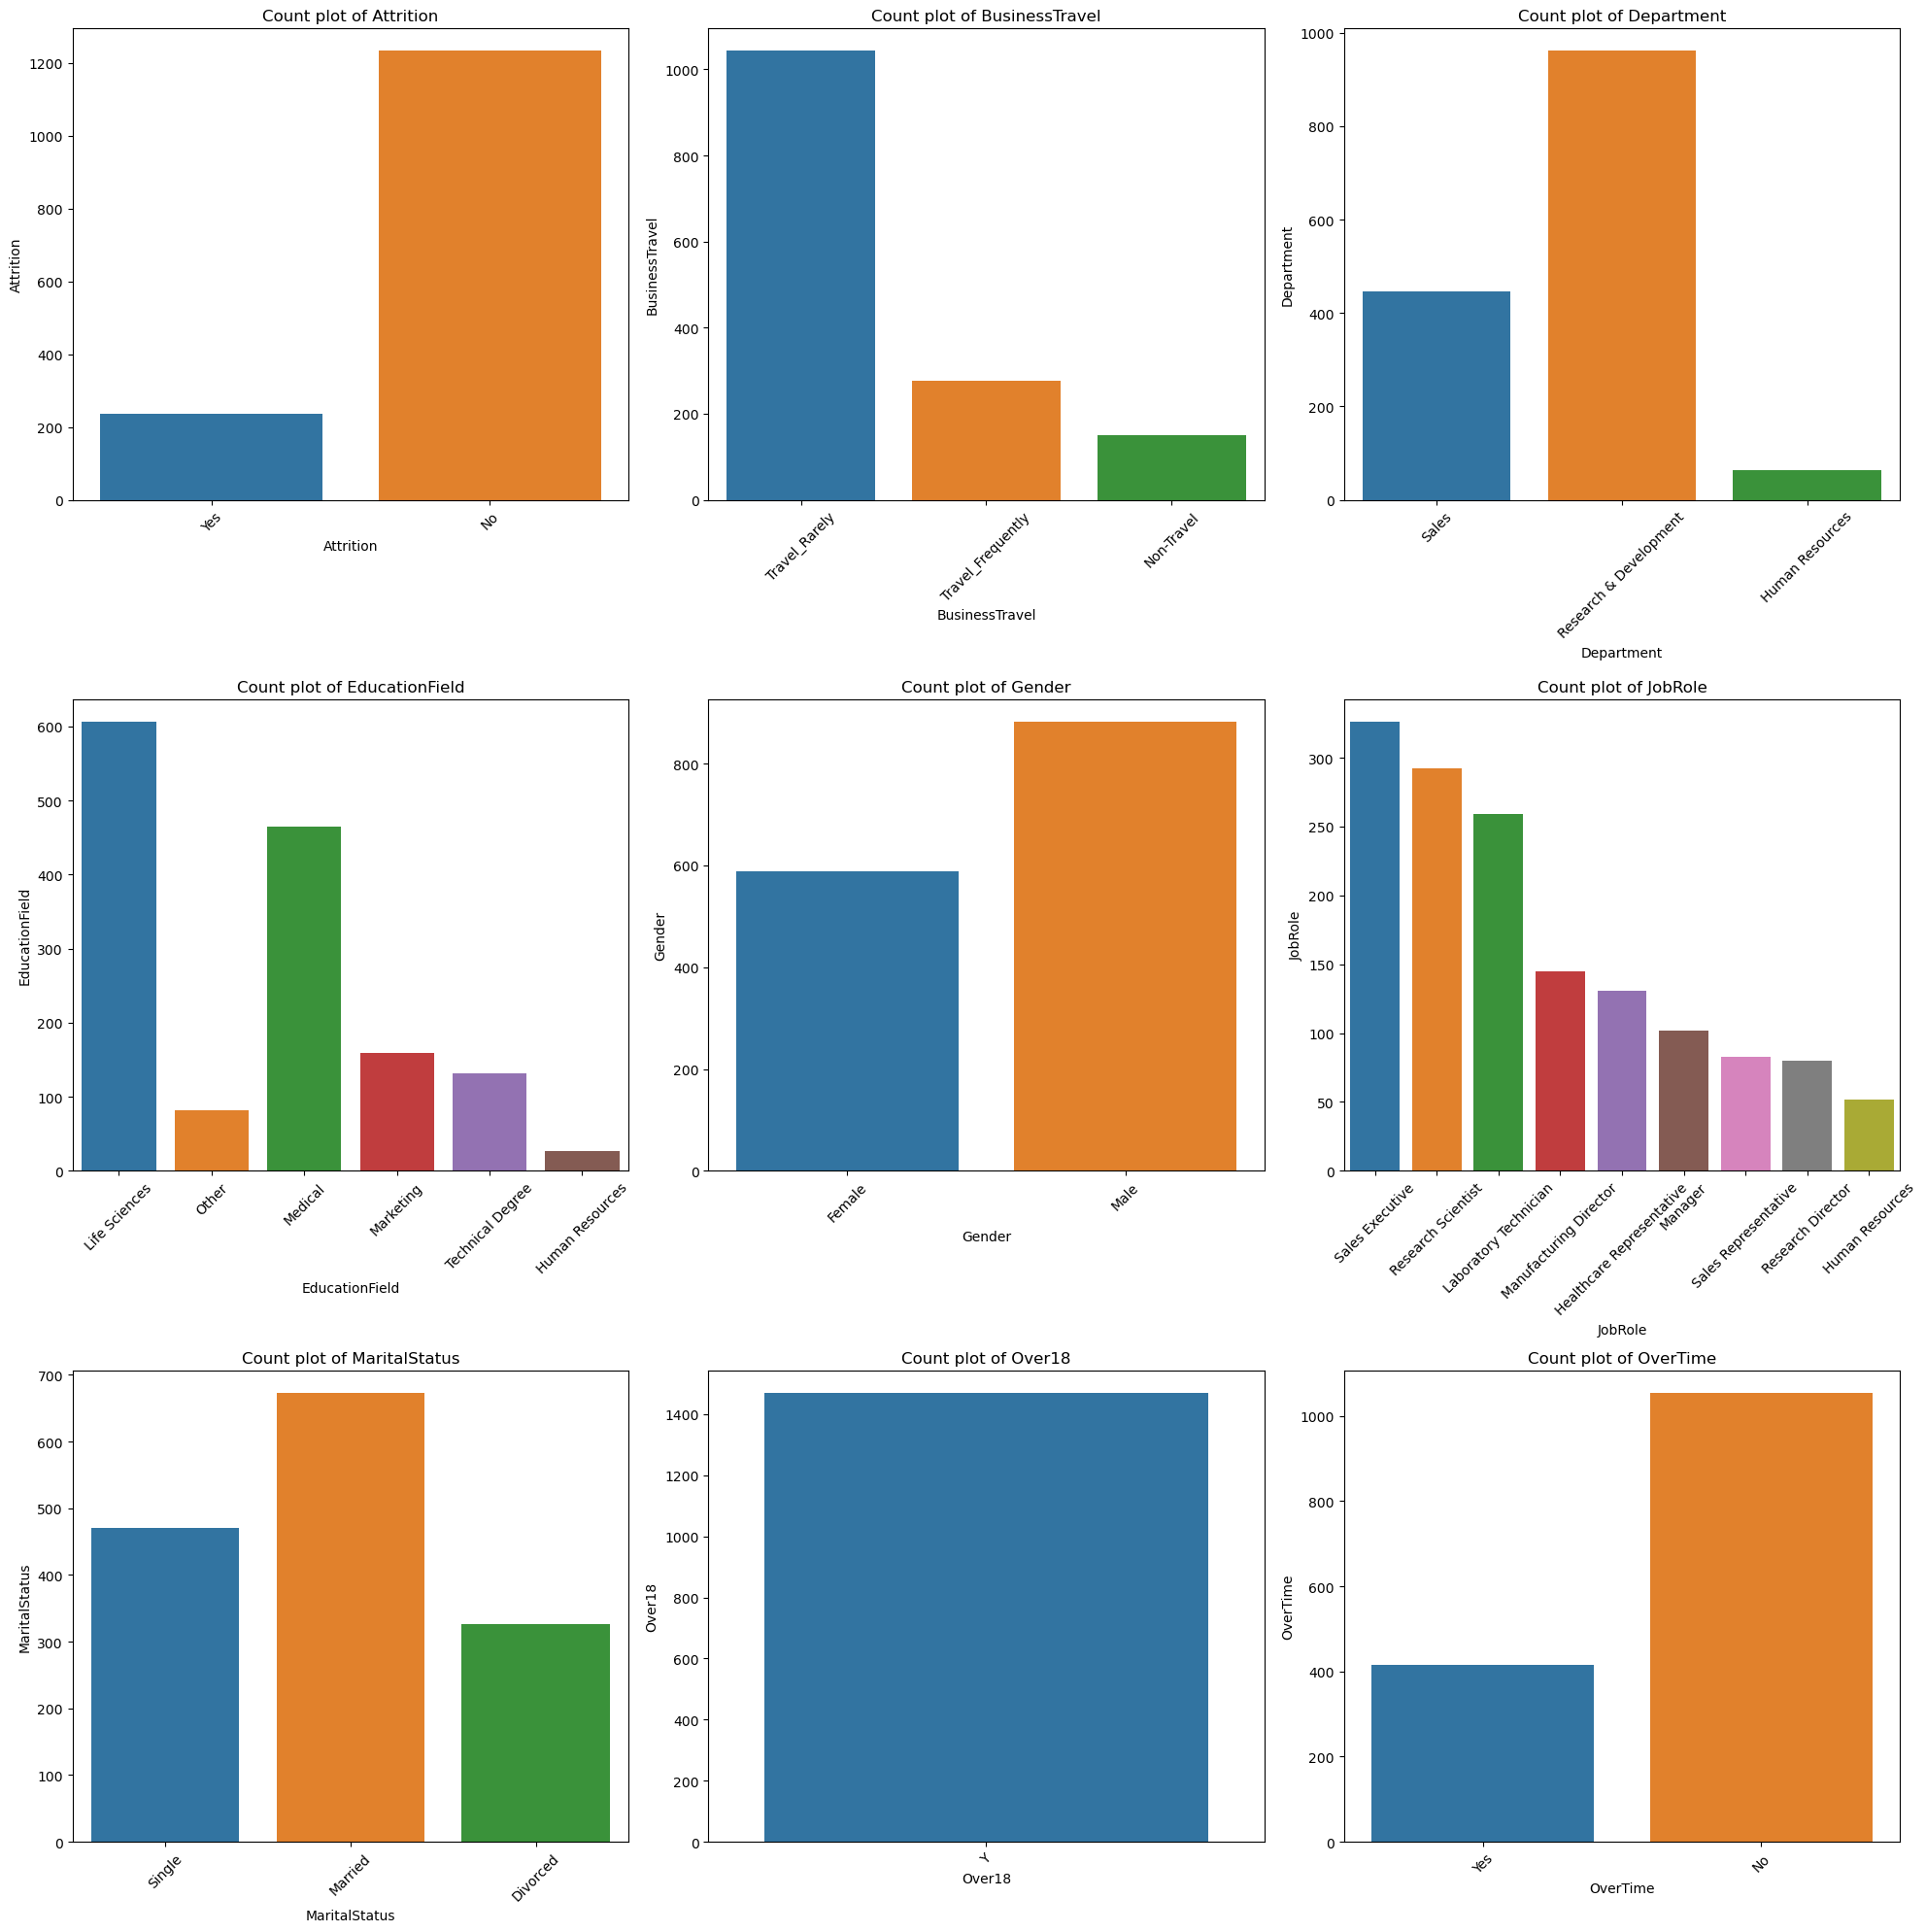

In [11]:
#countplot for Catogarical Data
numeric = data1.select_dtypes('object')
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,20))  # Adjust the figsize accordingly
axs = axs.flatten()

for i, var in enumerate(numeric.columns):
    sns.countplot(data=data1, x=var, ax=axs[i])  # Specify the ax parameter to assign each box plot to the correct subplot
    axs[i].set_title(f'Count plot of {var}')  # Set the title for the current subplot
    axs[i].set_ylabel(var)  # Set the ylabel for the current subplot
    axs[i].tick_params(axis='x', rotation=45)

fig.tight_layout()

plt.show()

In [12]:
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#mostly which department staffs left 
to_att=len(data1['Attrition'])
print(f'Total attritions counts is {to_att} in IBM')
q1=data1.groupby('Department')['Attrition']
att=q1.value_counts()
print(att)
print(q1)

Total attritions counts is 1470 in IBM
Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64


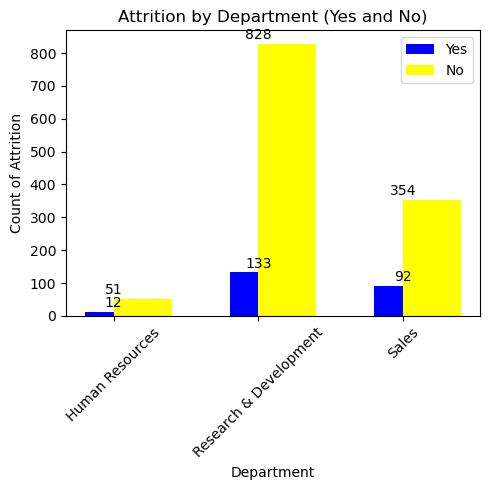

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Department': ['Human Resources', 'Human Resources', 'Research & Development', 'Research & Development', 'Sales', 'Sales'],
    'Attrition': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'Count': [51, 12, 828, 133, 354, 92]
}

df = pd.DataFrame(data)

# Separate data for 'Yes' and 'No' attrition
df_yes = df[df['Attrition'] == 'Yes']
df_no = df[df['Attrition'] == 'No']

# Create a bar chart with side-by-side bars
plt.figure(figsize=(5, 5))
plt.bar(df_yes['Department'], df_yes['Count'], label="Yes", width=0.4, color="blue", align='center')
plt.bar(df_no['Department'], df_no['Count'], label="No", width=0.4, color="yellow", align='edge')

for index, row in df.iterrows():
    plt.text(row['Department'], row['Count'] + 5, str(row['Count']), ha='center', va='bottom', fontsize=10)
    
plt.xlabel('Department')
plt.ylabel('Count of Attrition')
plt.title('Attrition by Department (Yes and No)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Total Attrition by 'Department','JobRole','EducationField'
to_att=len(data1['Attrition'])
print(f'Total attritions counts is {to_att} in IBM')
att=data1.groupby(['Department','JobRole','EducationField'])['Attrition'].count()
pd.DataFrame(att)

Total attritions counts is 1470 in IBM


Attrition
Department             JobRole                   EducationField             
Human Resources        Human Resources           Human Resources          21
                                                 Life Sciences            13
                                                 Medical                  11
                                                 Other                     3
                                                 Technical Degree          4
                       Manager                   Human Resources           6
                                                 Life Sciences             3
                                                 Medical                   2
Research & Development Healthcare Representative Life Sciences            60
                                                 Medical                  48
                                                 Other                     9
                                                 Technical Degree         14
                       Laboratory Technician     Life Sciences           119
                                                 Medical                  99
                                                 Other                    22
                                                 Technical Degree         19
                       Manager                   Life Sciences            21
                                                 Medical                  25
                                                 Other                     5
                                                 Technical Degree          3
                       Manufacturing Director    Life Sciences            71
                                                 Medical                  53
                                                 Other                     7
                                                 Technical Degree         14
                       Research Director         Life Sciences            36
                                                 Medical                  35
                                                 Other                     4
                                                 Technical Degree          5
                       Research Scientist        Life Sciences           133
                                                 Medical                 103
                                                 Other                    17
                                                 Technical Degree         39
Sales                  Manager                   Life Sciences            16
                                                 Marketing                14
                                                 Medical                   5
                                                 Technical Degree          2
                       Sales Executive           Life Sciences           107
                                                 Marketing               122
                                                 Medical                  65
                                                 Other                    13
                                                 Technical Degree         19
                       Sales Representative      Life Sciences            27
                                                 Marketing                23
                                                 Medical                  18
                                                 Other                     2
                                                 Technical Degree         13

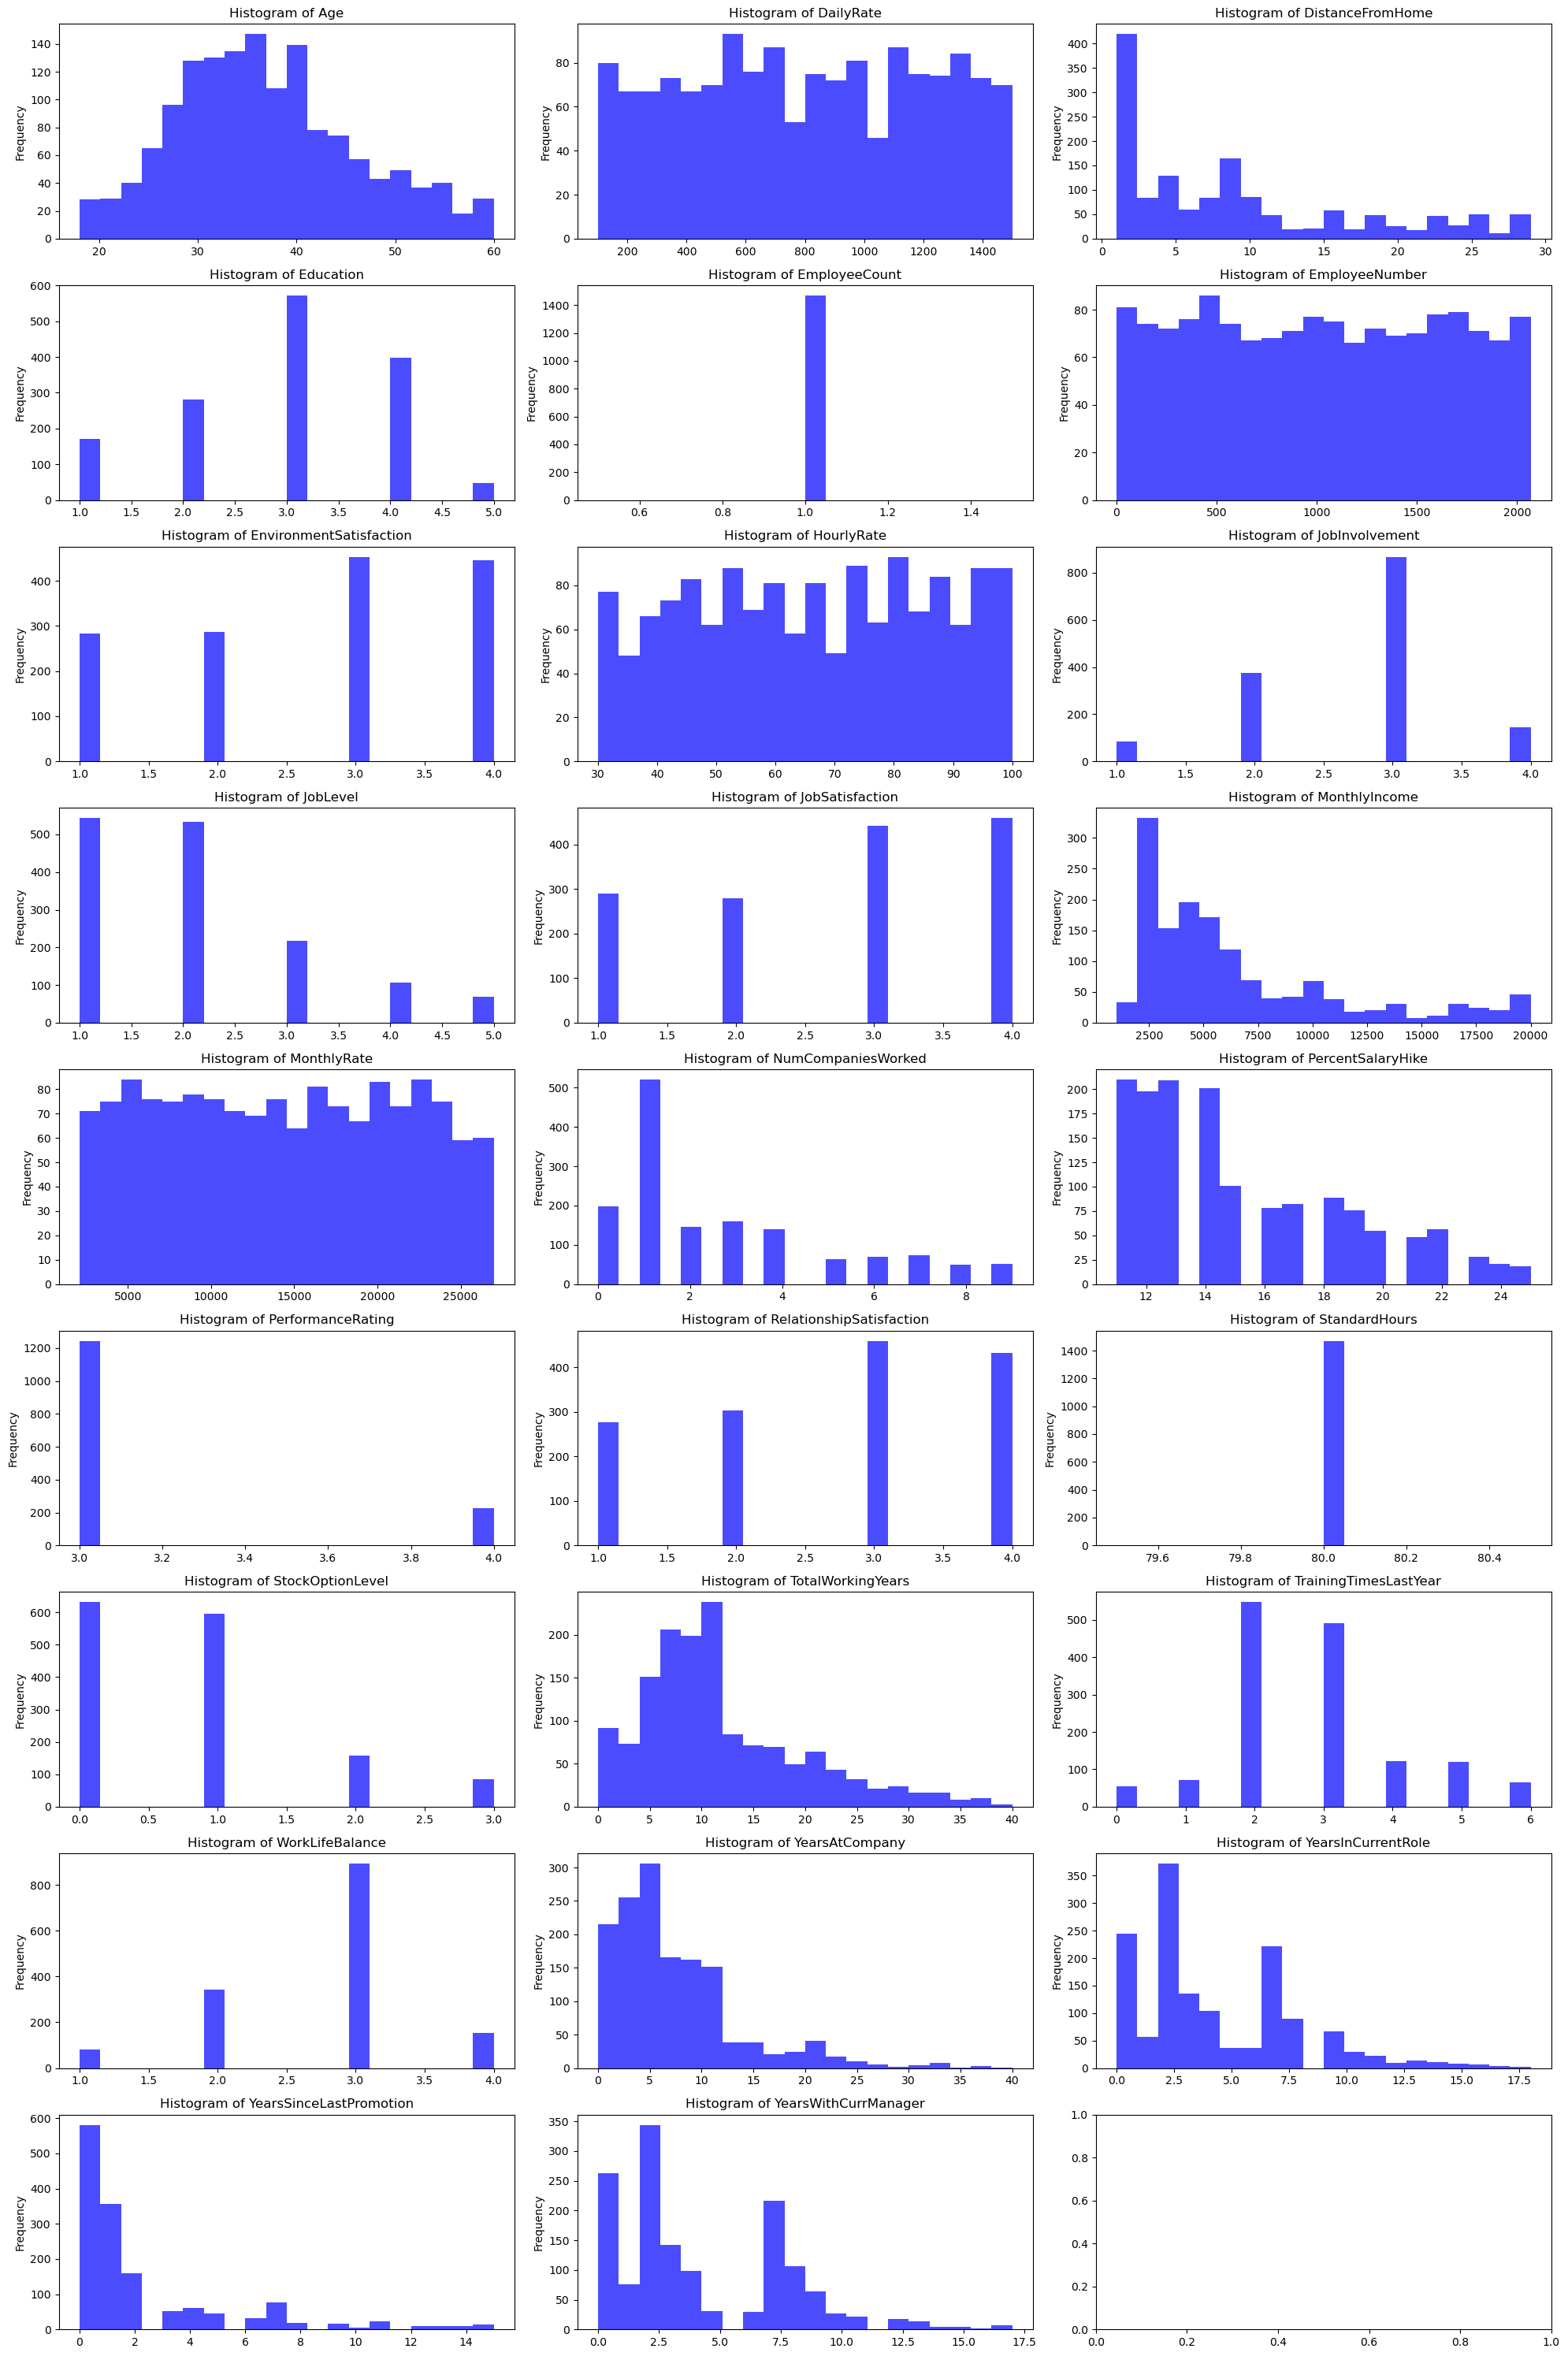

In [16]:
#Histogram
numeric = data1.select_dtypes('int64')
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))  # Adjust the figsize accordingly
axs = axs.flatten()

for i, var in enumerate(numeric.columns):
    axs[i].hist(data1[var], bins=20, alpha=0.7, color='blue')  # Specify the ax parameter to assign each histogram to the correct subplot
    axs[i].set_title(f'Histogram of {var}')  # Set the title for the current subplot
    axs[i].set_ylabel('Frequency')  # Set the ylabel for the current subplot

fig.tight_layout()

plt.show()


<Figure size 2000x1500 with 0 Axes>

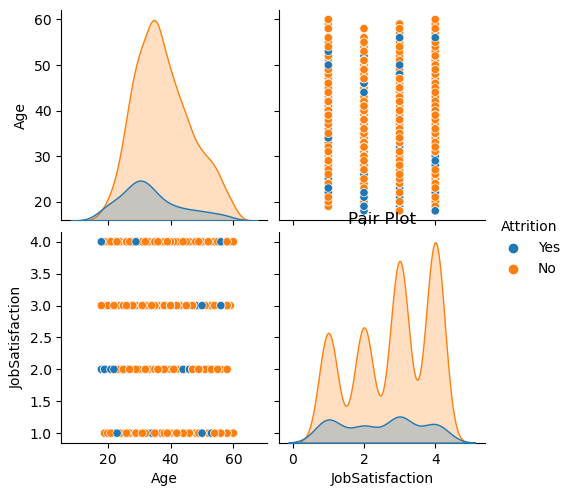

In [17]:
#Pair plot
plt.figure(figsize=(20,15))
sns.pairplot(data1[['Age', 'JobSatisfaction', 'Attrition']],kind='scatter',diag_kind='kde',hue='Attrition')
plt.title('Pair Plot')
plt.show()

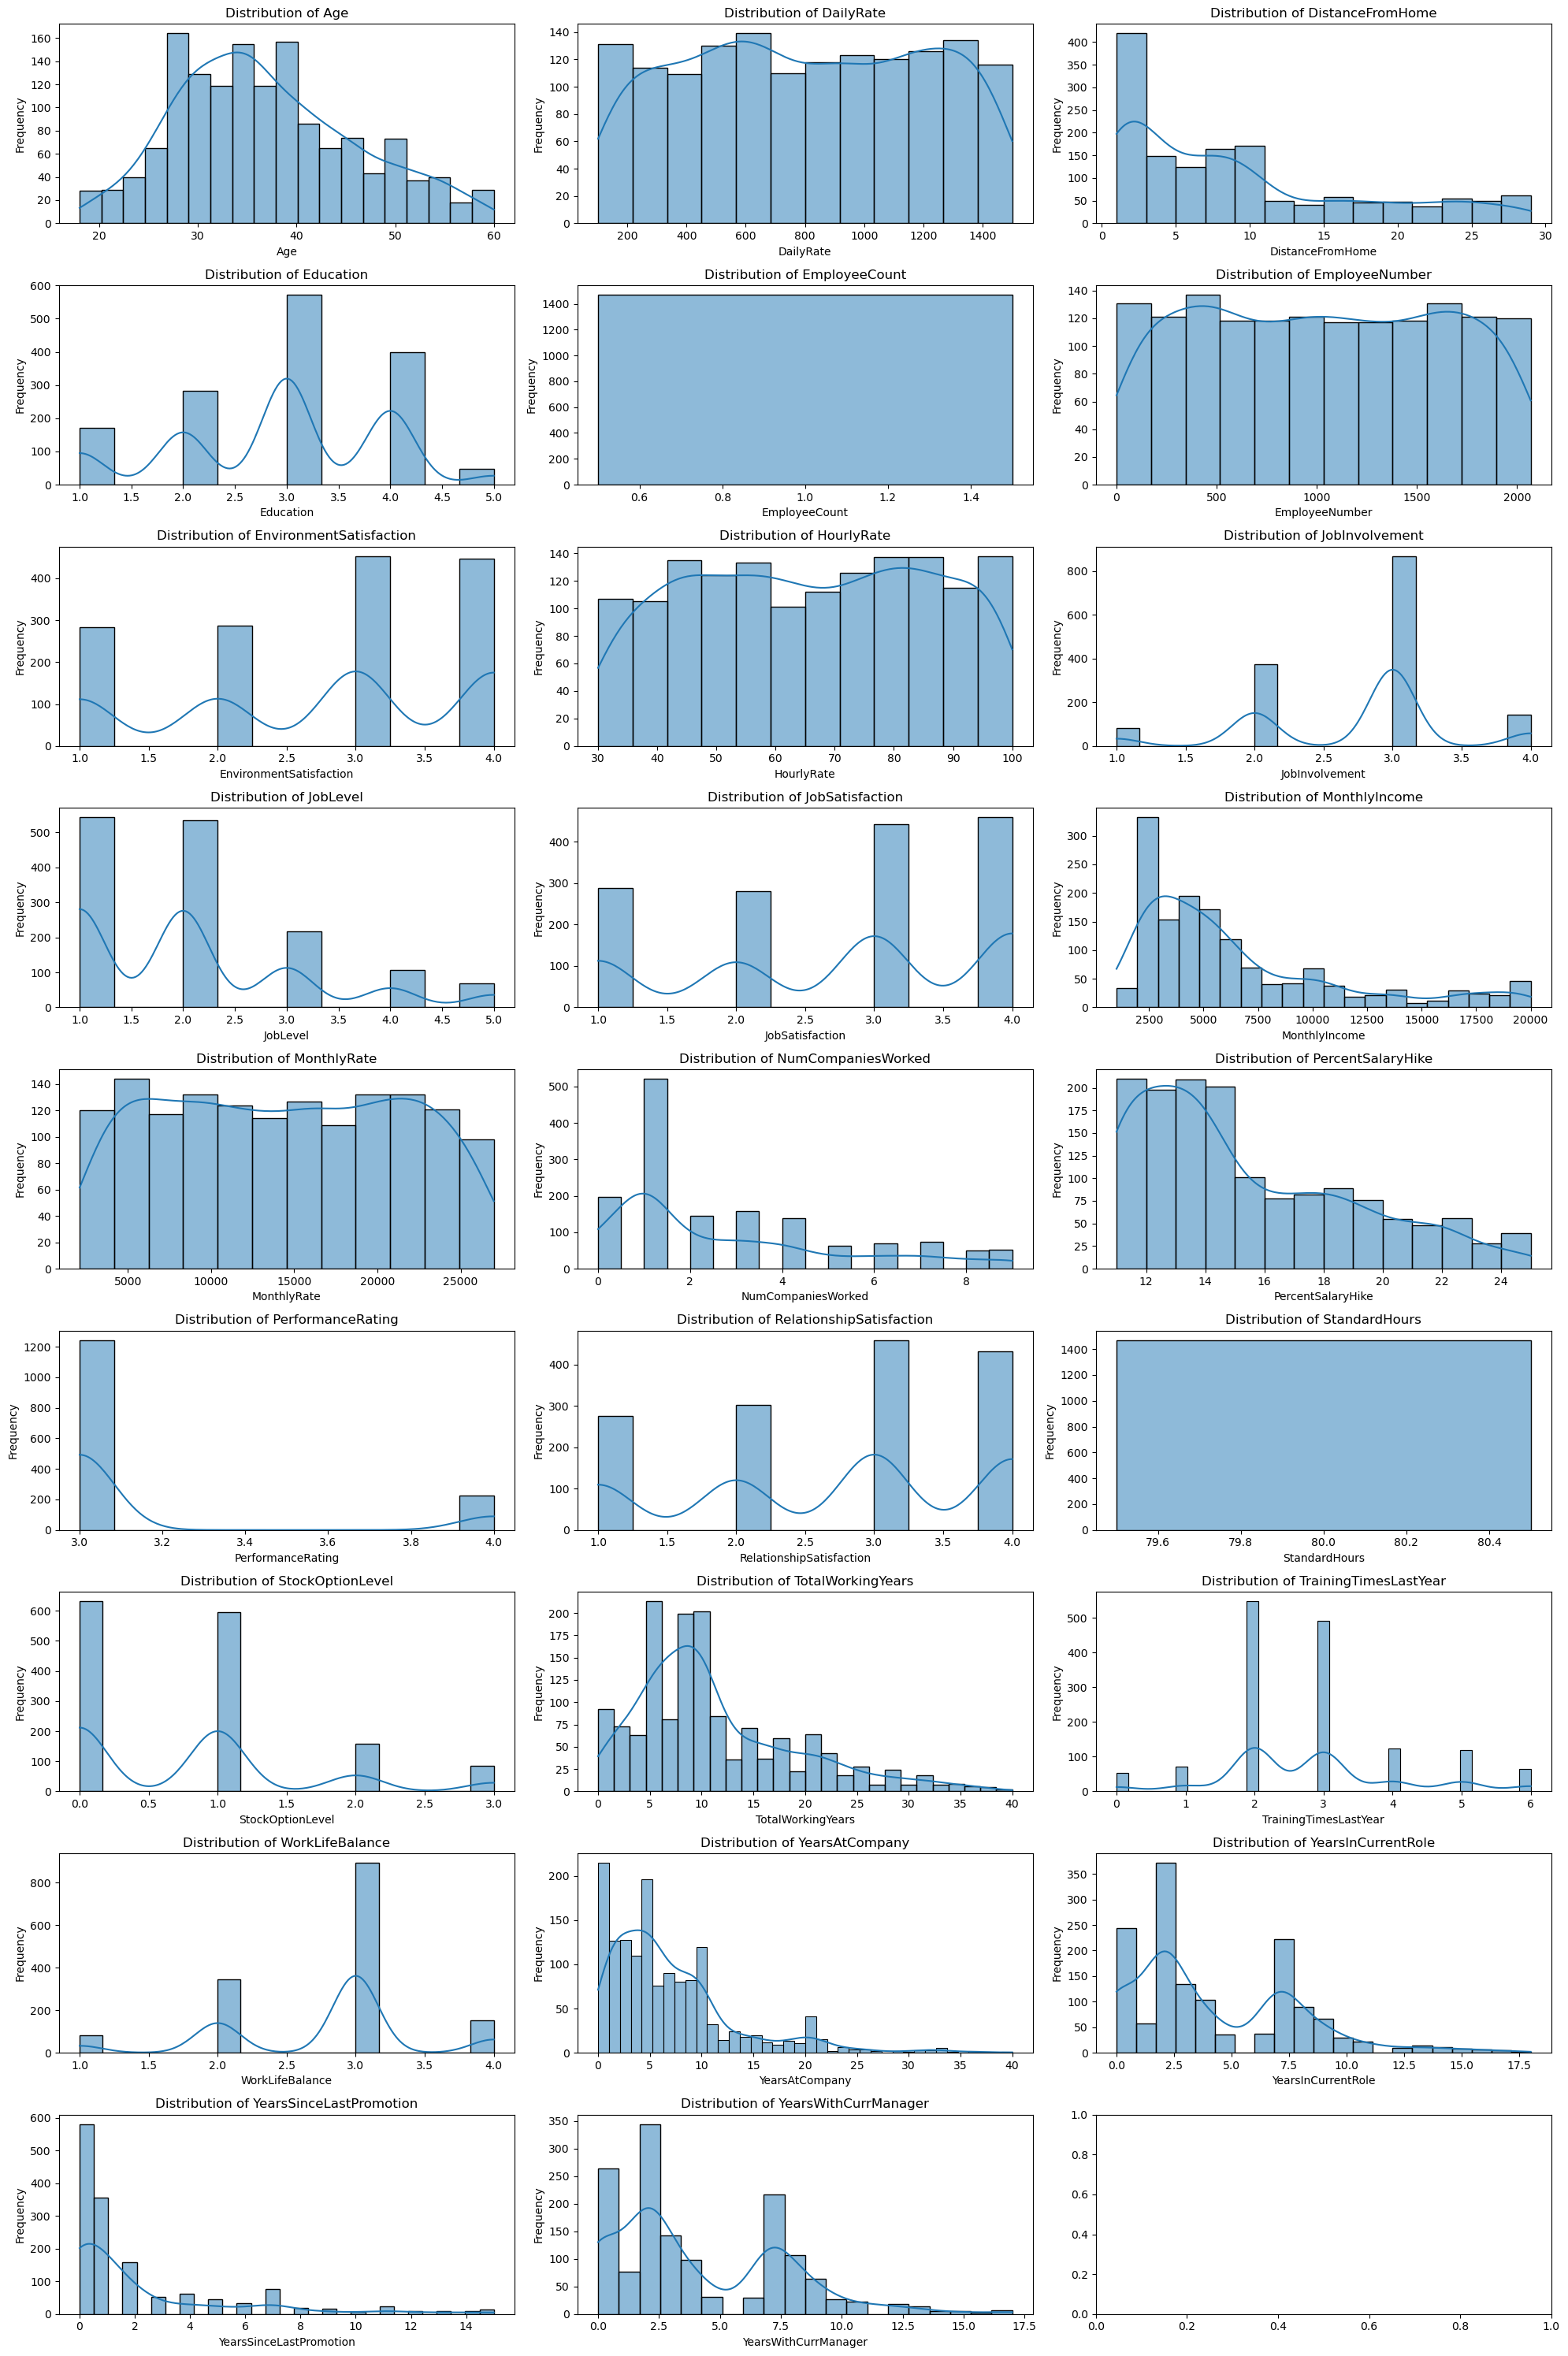

In [18]:
#displot
numeric = data1.select_dtypes('int64')
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))  # Adjust the figsize accordingly
axs = axs.flatten()

for i, var in enumerate(numeric.columns):
    sns.histplot(data=data1, x=var, ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')
    

fig.tight_layout()

plt.show()

In [19]:
numeric=data1.select_dtypes('int64')

In [20]:
numeric.head(2)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7


In [21]:
numeric.shape

(1470, 26)

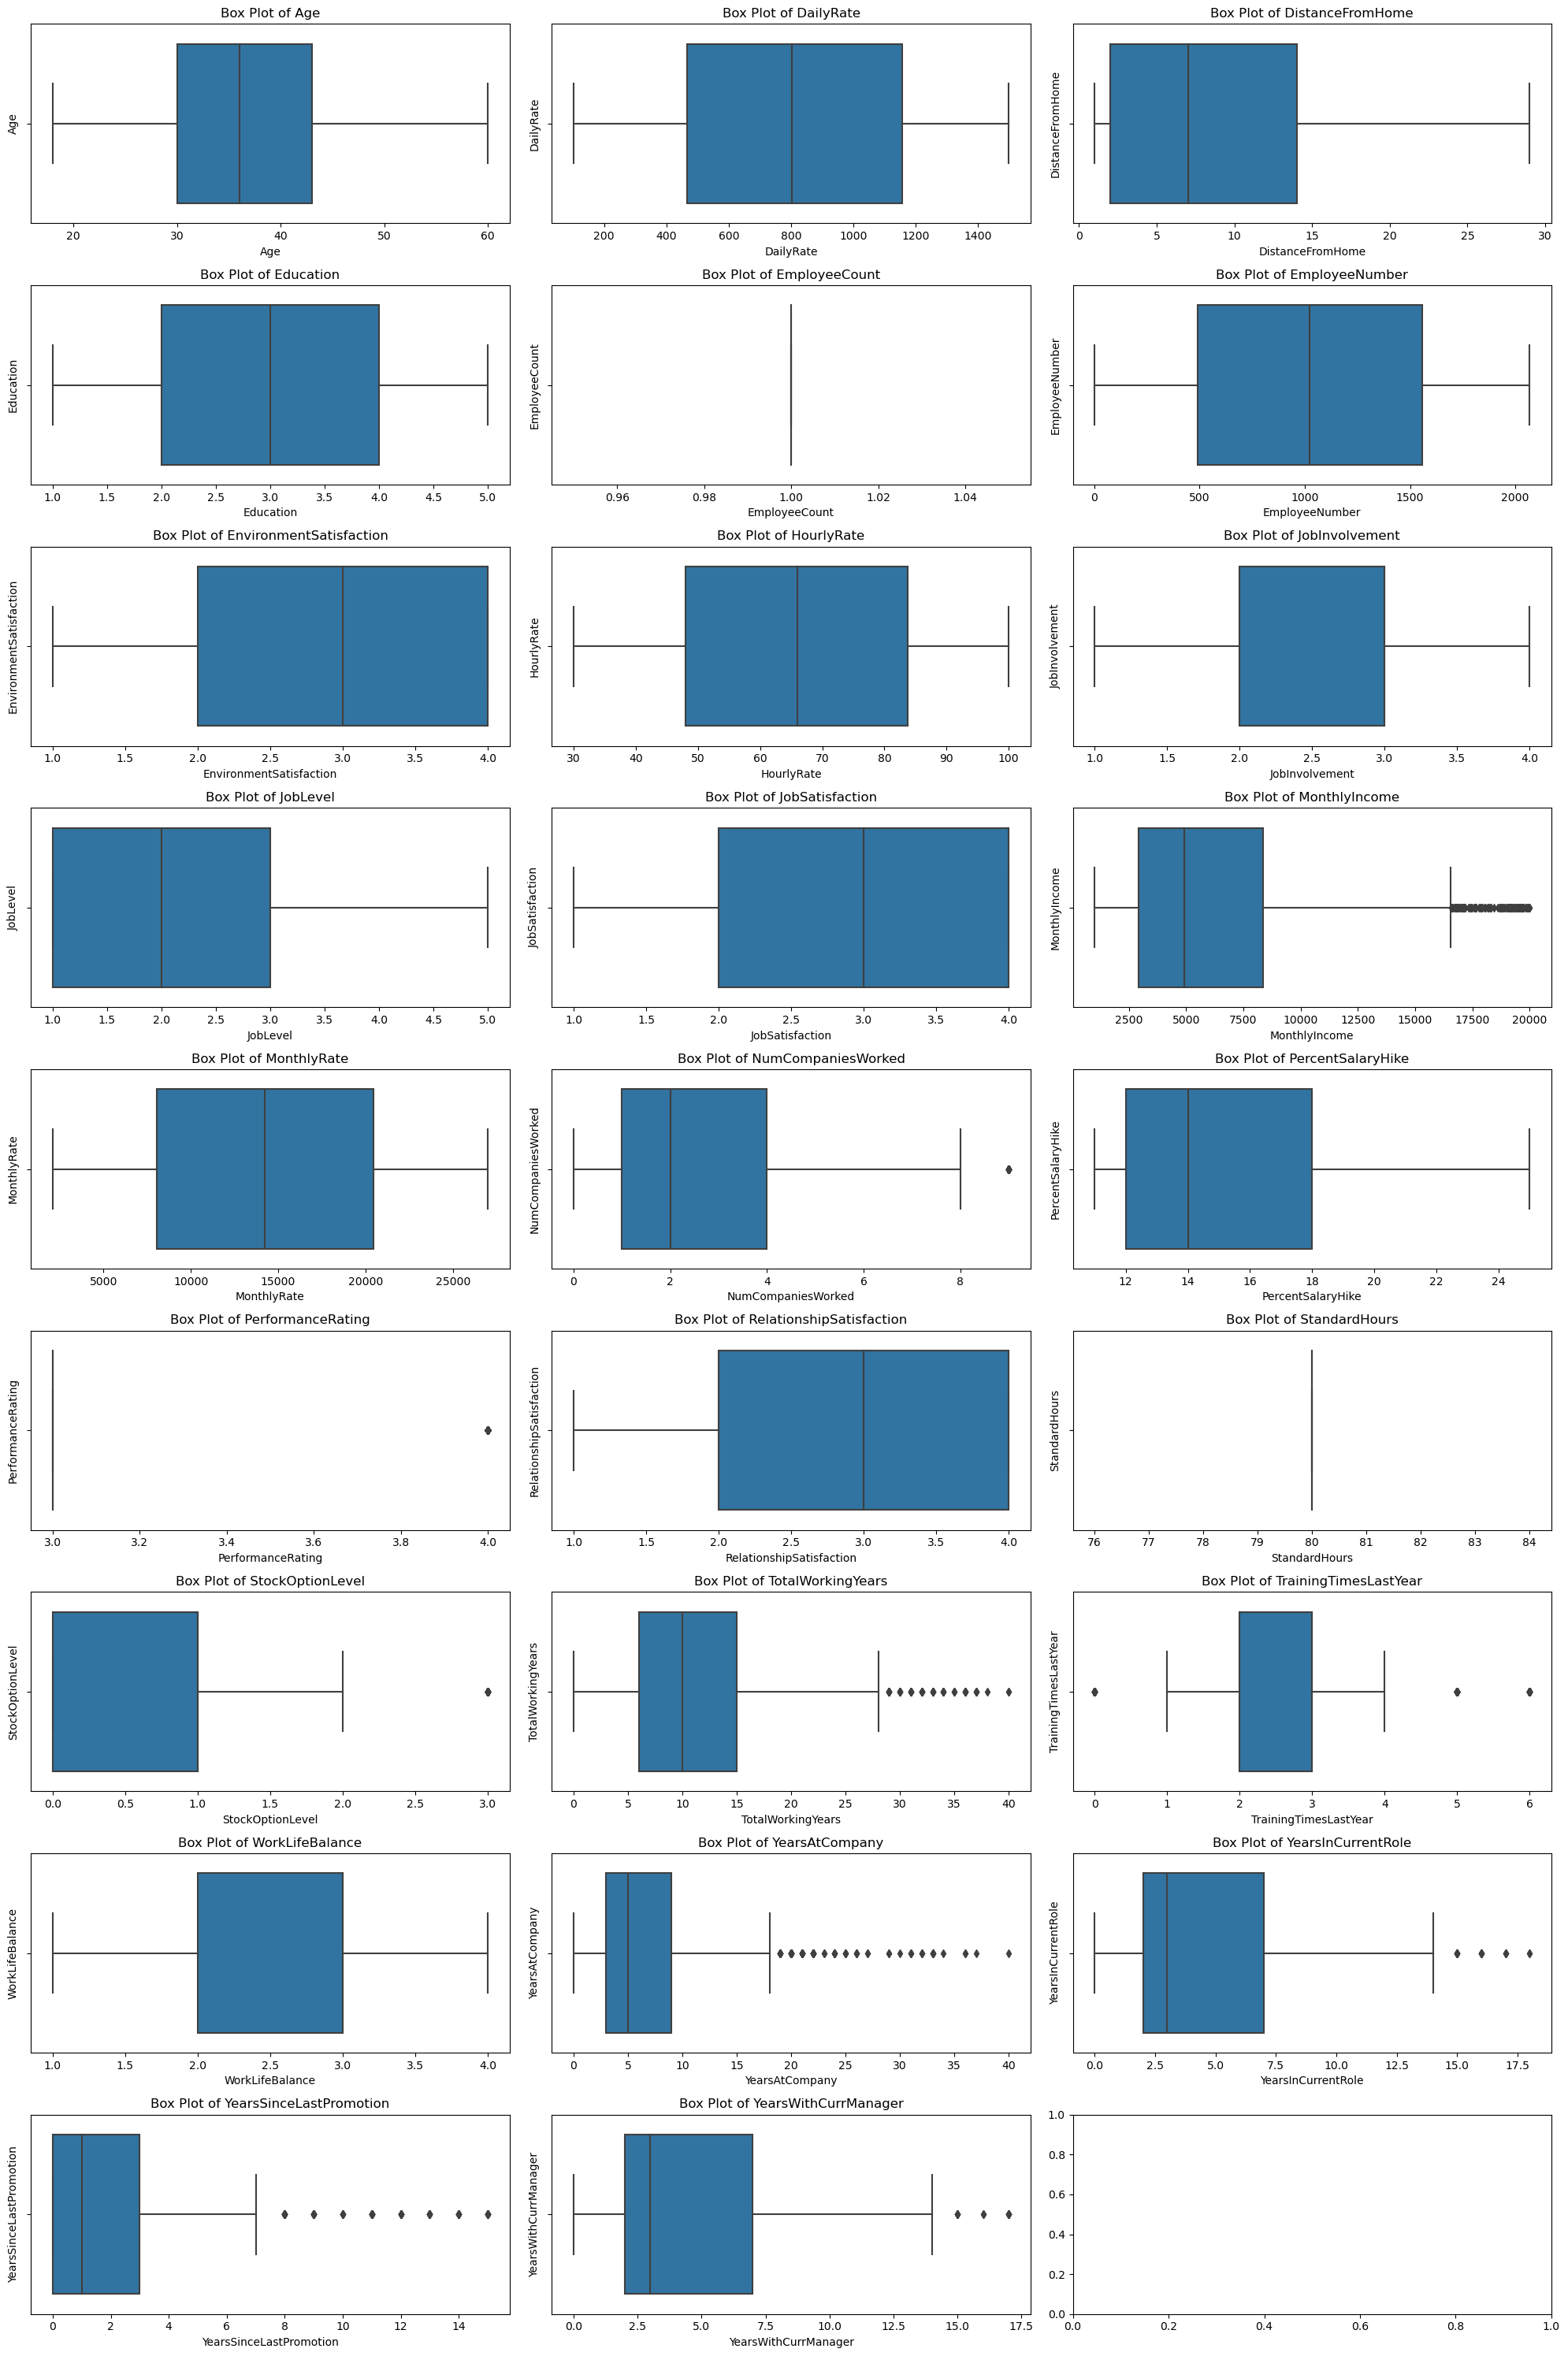

In [22]:
numeric = data1.select_dtypes('int64')
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))  # Adjust the figsize accordingly
axs = axs.flatten()

for i, var in enumerate(numeric.columns):
    sns.boxplot(data=data1, x=var, ax=axs[i])  # Specify the ax parameter to assign each box plot to the correct subplot
    axs[i].set_title(f'Box Plot of {var}')  # Set the title for the current subplot
    axs[i].set_ylabel(var)  # Set the ylabel for the current subplot

fig.tight_layout()

plt.show()

# Data Preprocessing_2)- Outlier Remove

#Outlier Remove Columns(MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager)



# Monthly Income

In [23]:
# Monthly Income
q1=data1['MonthlyIncome'].quantile(0.25)
q3=data1['MonthlyIncome'].quantile(0.75)
iqr=q3-q1

In [24]:
print('Q1:',q1,'Q3:',q3,'IQR:',iqr)

Q1: 2911.0 Q3: 8379.0 IQR: 5468.0


In [25]:
upper_limit=q3+(1.5*iqr)
lowe_limit=q1-(1.5*iqr)

In [26]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lowe_limit)

Upper_limit: 16581.0
Lower_limit: -5291.0


<Axes: >

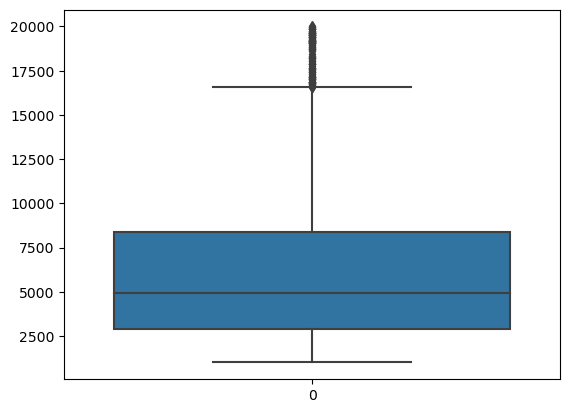

In [27]:
sns.boxplot(data1['MonthlyIncome'])

In [28]:
new_data=data1.loc[(data1['MonthlyIncome']>upper_limit) | (data1['MonthlyIncome']<lowe_limit)]

In [29]:
print('Before_Outlier:',len(data1))
print('Total_Outlier:',len(new_data))
print('After_Outlier:',len(data1)-len(new_data))

Before_Outlier: 1470
Total_Outlier: 114
After_Outlier: 1356


<Axes: >

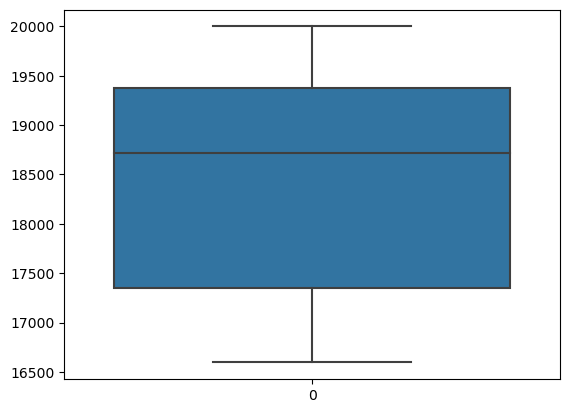

In [30]:
new_data.reset_index(drop=True, inplace=True)
sns.boxplot(new_data['MonthlyIncome'])

In [31]:
new_data.shape

(114, 35)

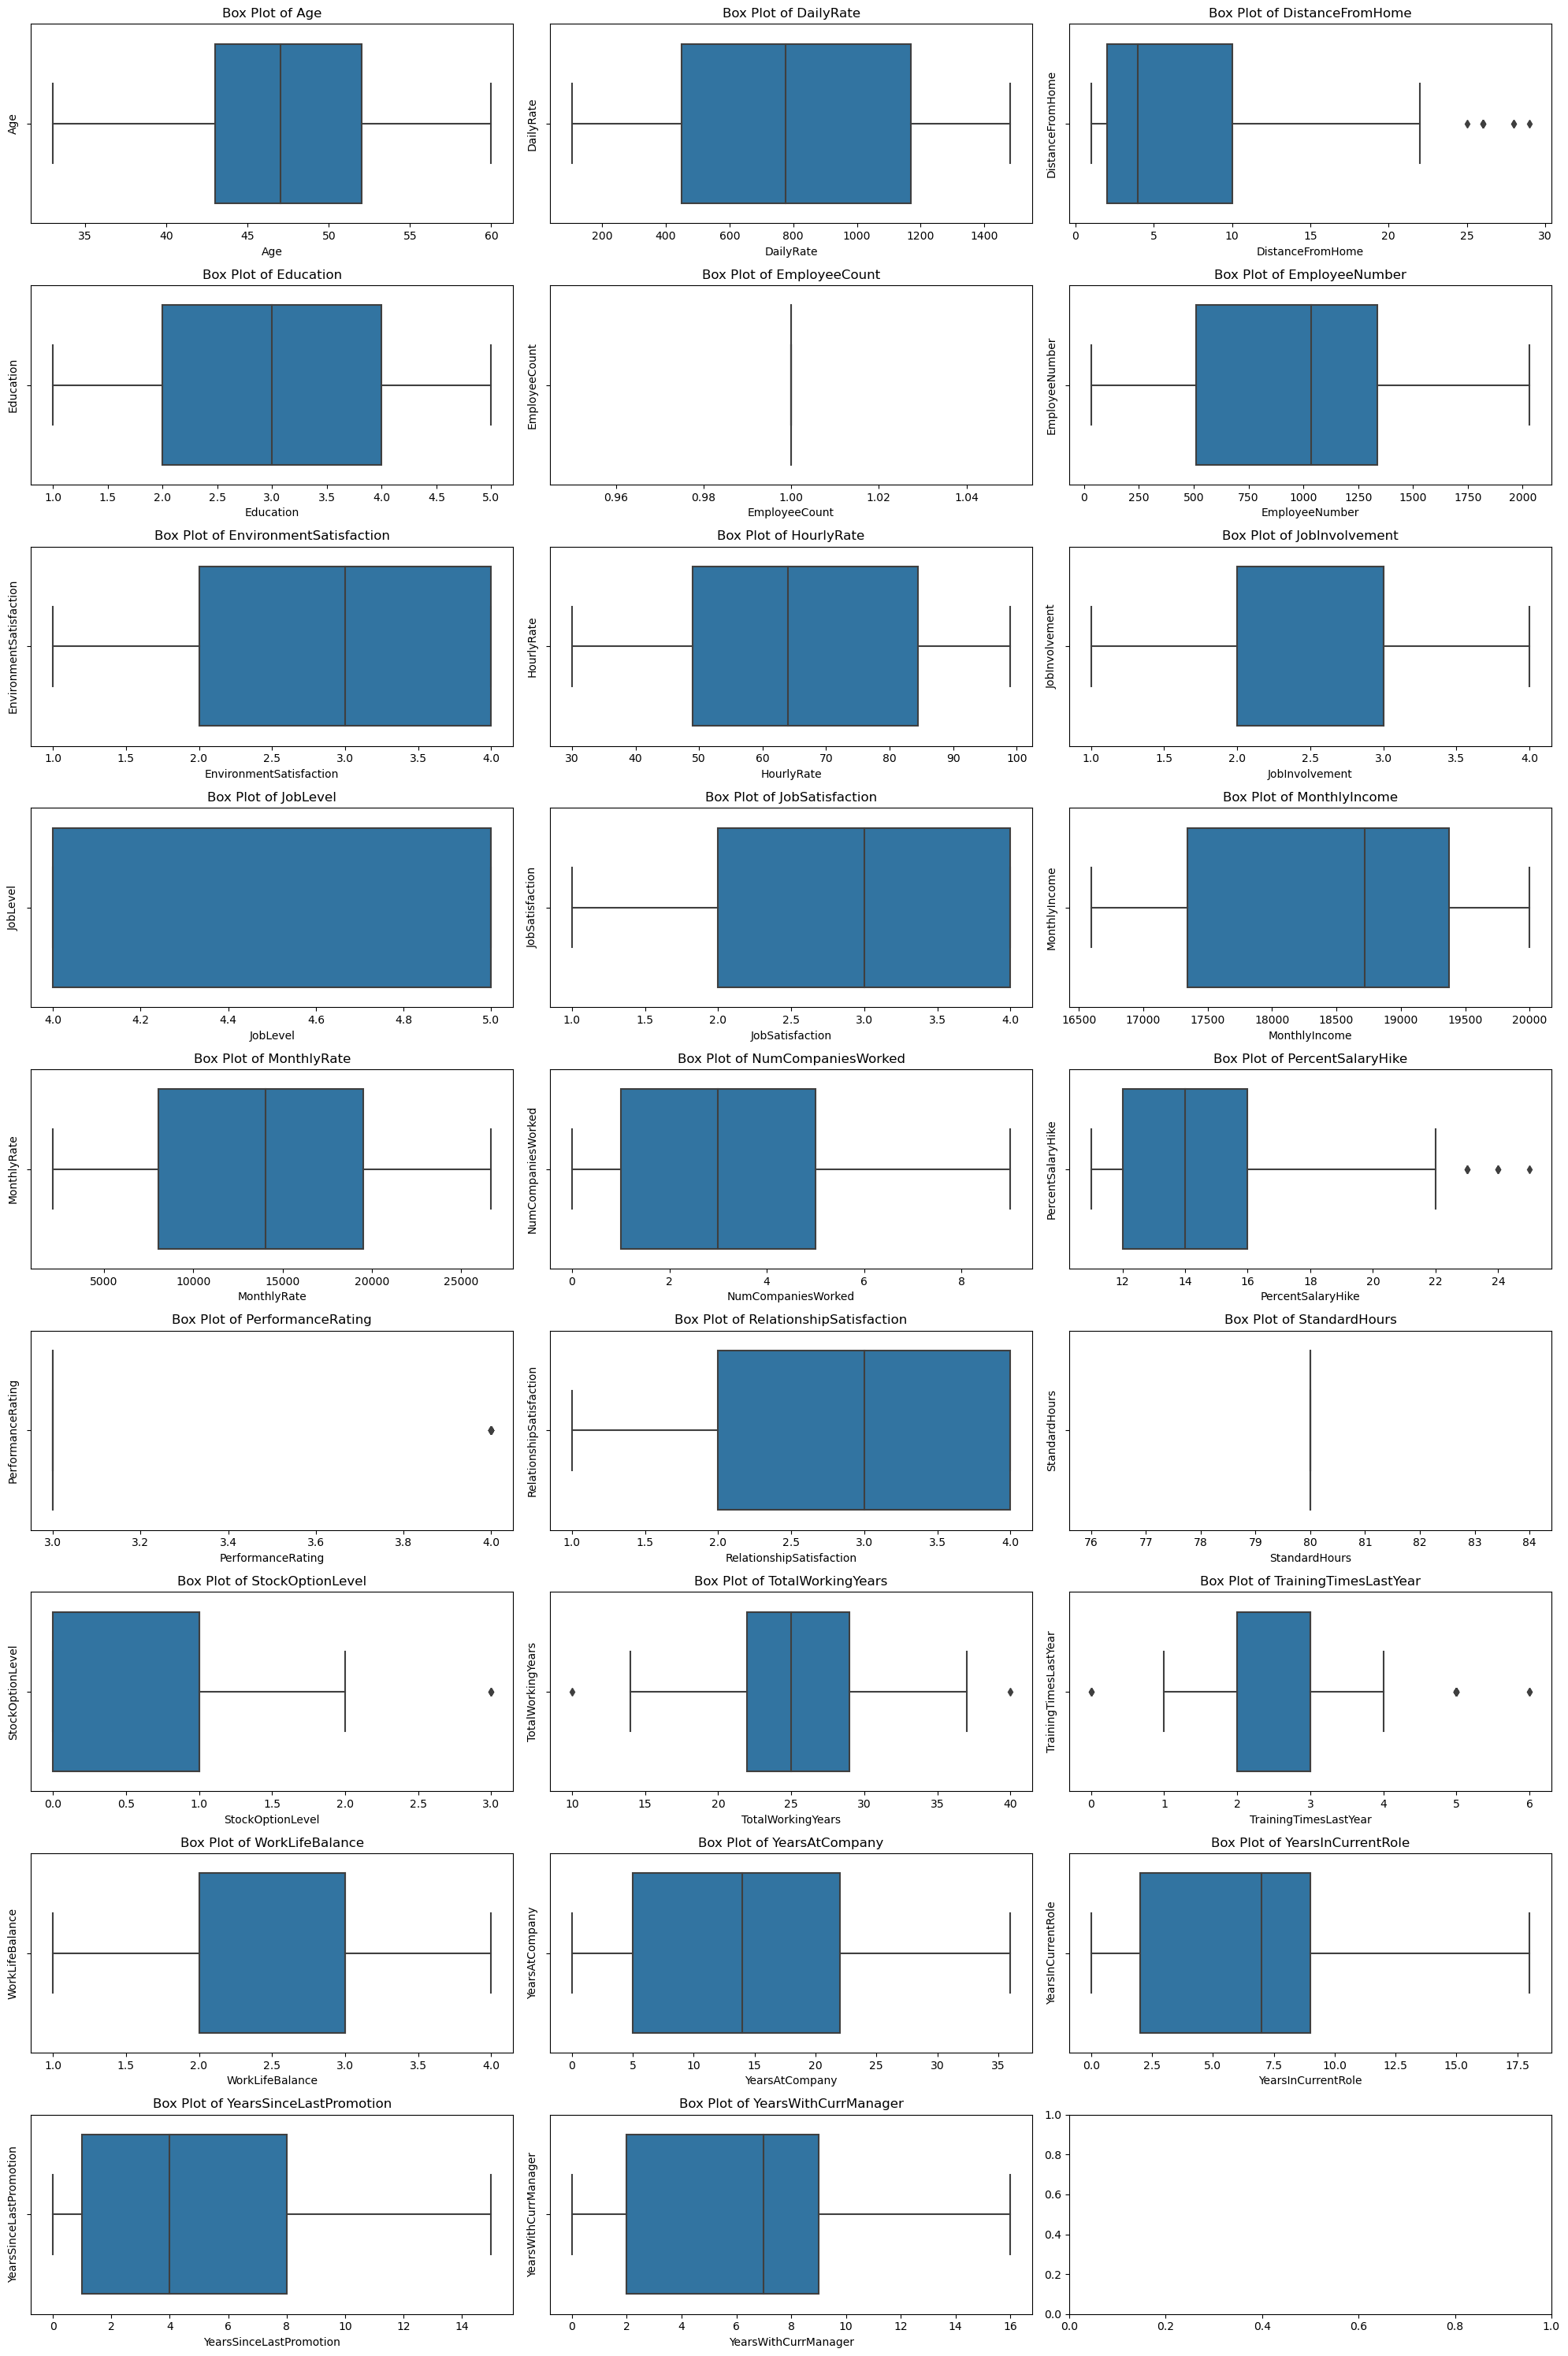

In [32]:
numeric = new_data.select_dtypes('int64')
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(20, 30))  # Adjust the figsize accordingly
axs = axs.flatten()

for i, var in enumerate(numeric.columns):
    sns.boxplot(data=new_data, x=var, ax=axs[i])  # Specify the ax parameter to assign each box plot to the correct subplot
    axs[i].set_title(f'Box Plot of {var}')  # Set the title for the current subplot
    axs[i].set_ylabel(var)  # Set the ylabel for the current subplot

fig.tight_layout()

plt.show()

In [33]:
new_data.shape

(114, 35)

In [34]:
data1.shape

(1470, 35)

In [35]:
final_data = pd.concat([data1, new_data]).drop_duplicates(keep=False)
final_data.reset_index(drop=True, inplace=True)
final_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1352,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1353,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1354,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# Feature Engineernig

In [36]:
final_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [37]:
final_data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [38]:
model_data=final_data.drop(['EmployeeNumber','MaritalStatus','NumCompaniesWorked','TrainingTimesLastYear','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)

In [39]:
model_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,Y,Yes,11,3,1,80,0,8,1,6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,Y,No,23,4,4,80,1,10,3,10
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,Y,Yes,15,3,2,80,0,7,3,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,Y,Yes,11,3,3,80,0,8,3,8
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,Y,No,12,3,4,80,1,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,Y,No,17,3,3,80,1,17,3,5
1352,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,Y,No,15,3,1,80,1,9,3,7
1353,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,Y,Yes,20,4,2,80,1,6,3,6
1354,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,Y,No,14,3,4,80,0,17,2,9


In [40]:
model_data['Attrition'] = model_data['Attrition'].map({'Yes': 1, 'No': 0})

In [41]:
model_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,Y,Yes,11,3,1,80,0,8,1,6
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,Y,No,23,4,4,80,1,10,3,10
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,Y,Yes,15,3,2,80,0,7,3,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,Y,Yes,11,3,3,80,0,8,3,8
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,Y,No,12,3,4,80,1,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,...,Y,No,17,3,3,80,1,17,3,5
1352,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,...,Y,No,15,3,1,80,1,9,3,7
1353,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,...,Y,Yes,20,4,2,80,1,6,3,6
1354,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,4,...,Y,No,14,3,4,80,0,17,2,9


In [42]:
#One_hot Encoding
catogarical=model_data.select_dtypes('object')
dummy=pd.get_dummies(catogarical)

In [43]:
catogarical.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'Over18', 'OverTime'],
      dtype='object')

In [44]:
dummy

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
1352,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1353,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1354,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


In [45]:
last_data = pd.concat([model_data, dummy], axis=1)

In [46]:
samurai=last_data.drop(catogarical,axis=1)

In [47]:
samurai

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,...,0,0,0,0,0,1,0,1,0,1
1,49,0,279,8,1,1,3,61,2,2,...,0,0,0,0,1,0,0,1,1,0
2,37,1,1373,2,2,1,4,92,2,1,...,1,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,1,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,0,884,23,2,1,3,41,4,2,...,1,0,0,0,0,0,0,1,1,0
1352,39,0,613,6,1,1,4,42,2,3,...,0,0,0,0,0,0,0,1,1,0
1353,27,0,155,4,3,1,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1354,49,0,1023,2,3,1,4,63,2,2,...,0,0,0,0,0,1,0,1,1,0


# Data Split and modeling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
x=samurai.drop(['Attrition'],axis=1)
y=samurai['Attrition']

In [50]:
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,1,0,1
1,49,279,8,1,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,1,0
2,37,1373,2,2,1,4,92,2,1,3,...,1,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,1,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,36,884,23,2,1,3,41,4,2,4,...,1,0,0,0,0,0,0,1,1,0
1352,39,613,6,1,1,4,42,2,3,1,...,0,0,0,0,0,0,0,1,1,0
1353,27,155,4,3,1,2,87,4,2,2,...,0,0,1,0,0,0,0,1,0,1
1354,49,1023,2,3,1,4,63,2,2,2,...,0,0,0,0,0,1,0,1,1,0


In [51]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1351    0
1352    0
1353    0
1354    0
1355    0
Name: Attrition, Length: 1356, dtype: int64

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [53]:
model=DecisionTreeClassifier(random_state=42)
scale=StandardScaler()

In [54]:
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

In [55]:
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
y_pred=model.predict(x_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [57]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [58]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.75
Confusion Matrix:
 [[287  56]
 [ 44  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       343
           1       0.26      0.31      0.29        64

    accuracy                           0.75       407
   macro avg       0.57      0.57      0.57       407
weighted avg       0.77      0.75      0.76       407



In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model1=LogisticRegression()

In [71]:
model1.fit(x_train_scaled,y_train)

LogisticRegression()

In [72]:
y_pred1=model.predict(x_test_scaled)

In [73]:
accuracy = accuracy_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

In [74]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Accuracy: 0.75
Confusion Matrix:
 [[287  56]
 [ 44  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85       343
           1       0.26      0.31      0.29        64

    accuracy                           0.75       407
   macro avg       0.57      0.57      0.57       407
weighted avg       0.77      0.75      0.76       407

